In [1]:
import numpy as np
import cv2 as cv
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
ia=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/bad' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ia.append(img_array)
print(ia)  
    #img_array=(img_array.flatten())
    #img_array=img_array.reshape(-1,1).T/255 # Each pixel value ranges from 0-255 
    #imv=cv.imshow('img',img_array)
   #plt.imshow(img_array, cmap='gray') 
   #plt.show
   #print(img_array)
  # with open('imgshoulder.csv','ab' ) as f:
        #np.savetxt(f, img_array, delimiter=',')

[array([[[226, 229, 227],
        [136, 137, 135],
        [126, 120, 121],
        ...,
        [146, 135, 137],
        [152, 138, 140],
        [130, 116, 118]],

       [[230, 237, 234],
        [168, 173, 171],
        [184, 182, 182],
        ...,
        [139, 133, 134],
        [144, 136, 137],
        [133, 122, 124]],

       [[227, 244, 241],
        [205, 219, 217],
        [230, 238, 237],
        ...,
        [134, 136, 137],
        [139, 139, 139],
        [144, 142, 142]],

       ...,

       [[ 86, 100,  99],
        [ 89, 103, 102],
        [ 98, 108, 108],
        ...,
        [160, 174, 172],
        [232, 244, 244],
        [147, 159, 159]],

       [[ 56,  72,  71],
        [ 75,  91,  90],
        [ 99, 111, 111],
        ...,
        [162, 176, 174],
        [236, 249, 247],
        [144, 157, 155]],

       [[ 45,  63,  62],
        [ 61,  77,  76],
        [ 73,  85,  85],
        ...,
        [153, 167, 165],
        [232, 245, 243],
        [143, 156, 154]

In [2]:
# We grab width and height of each bad images
carab=[imgb.shape[:2] for imgb in ia]
carab

[(160, 28),
 (178, 26),
 (174, 26),
 (190, 26),
 (183, 27),
 (180, 26),
 (177, 28),
 (161, 26),
 (173, 25),
 (151, 19),
 (151, 22),
 (153, 22),
 (154, 21),
 (155, 23),
 (153, 22),
 (155, 23),
 (154, 21),
 (186, 27),
 (185, 25),
 (187, 27),
 (185, 24),
 (184, 27),
 (191, 25),
 (190, 24),
 (190, 25),
 (187, 24),
 (191, 26),
 (193, 24),
 (187, 25),
 (188, 23),
 (192, 24),
 (191, 24),
 (190, 24),
 (170, 24),
 (152, 20),
 (149, 18),
 (151, 16),
 (152, 19),
 (182, 20),
 (183, 21),
 (183, 22),
 (193, 21),
 (190, 23),
 (187, 24),
 (166, 22),
 (168, 20),
 (164, 18),
 (175, 21),
 (176, 19),
 (178, 20),
 (173, 18),
 (145, 15),
 (179, 19)]

In [3]:
# Convertion of the image from the RGB color space to LAB color space
imageb=[]
for i in range(len(ia)):
  imageb.append(cv.cvtColor(ia[i], cv.COLOR_BGR2LAB))
Newimageb=[]
for j in range(len(imageb)):
  Newimageb.append((imageb[j]).reshape(((imageb[j]).shape)[0]*((imageb[j]).shape)[1], 3))
Newimageb
print((Newimageb[0]).shape)

(4480, 3)


In [4]:
# We apply k-means using the specified number of clusters and and we create the quantized images bsed on the predictions
clt=MiniBatchKMeans(n_clusters=32)
labels=[]
quant=[]
for i in range(len(Newimageb)):
  labels.append(clt.fit_predict(Newimageb[i]))
for i in range(len(Newimageb)):  
  quant.append(clt.cluster_centers_.astype('uint8')[labels[i]])
print(np.size(quant[0]))


13440


In [5]:
# reshape the feature vectors to images
quantR=[]
for i in range(len(Newimageb)):
  quantR.append((quant[i]).reshape((imageb[i]).shape))

In [6]:
# Convert from LAB to RGB
quantFb=[]
for i in range(len(quantR)):
  quantFb.append(cv.cvtColor(quantR[i], cv.COLOR_LAB2BGR))
print(quantFb[1])
(quantFb[1]).shape

[[[220 224 223]
  [107 116 116]
  [107 116 116]
  ...
  [229 233 232]
  [220 224 223]
  [220 224 223]]

 [[220 224 223]
  [229 233 232]
  [229 233 232]
  ...
  [220 224 223]
  [229 233 232]
  [ 26  31  30]]

 [[162 170 169]
  [ 36  40  39]
  [ 87  90  92]
  ...
  [ 26  31  30]
  [190 194 194]
  [ 36  40  39]]

 ...

 [[190 194 194]
  [124 132 131]
  [213 217 217]
  ...
  [250 252 250]
  [ 36  40  39]
  [250 252 250]]

 [[124 132 131]
  [177 185 184]
  [124 132 131]
  ...
  [ 36  40  39]
  [ 95 103 101]
  [ 82  91  91]]

 [[220 224 223]
  [107 116 116]
  [107 116 116]
  ...
  [ 55  61  62]
  [195 201 199]
  [195 201 199]]]


(178, 26, 3)

In [7]:
from skimage.color import rgb2gray
QuantB=[]
for i in range(len(quantFb)):
  QuantB.append(cv.cvtColor(quantFb[i], cv.COLOR_BGR2GRAY))
QuantB[1]

array([[223, 115, 115, ..., 232, 223, 223],
       [223, 232, 232, ..., 223, 232,  30],
       [169,  39,  90, ...,  30, 194,  39],
       ...,
       [194, 131, 217, ..., 251,  39, 251],
       [131, 184, 131, ...,  39, 101,  90],
       [223, 115, 115, ...,  61, 200, 200]], dtype=uint8)

In [8]:
import numpy as np
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy

#rgbImg = io.imread('https://i.stack.imgur.com/1xDvJ.jpg')
#grayImg = img_as_ubyte(color.rgb2gray(rgbImg))
#angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
distance=[1]
angle=[0, np.pi/4, np.pi/2, 3*np.pi/4]
properties = ['contrast','energy', 'dissimilarity', 'homogeneity']
Features=[]
for i in range(len(QuantB)):
  glcm = greycomatrix(QuantB[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  feats= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
  Features.append(feats)
print(Features)

[array([6.59210440e+03, 7.53733683e+03, 6.46603145e+03, 7.57554833e+03,
       6.09148258e-02, 4.61530526e-02, 6.42596370e-02, 4.69176513e-02,
       6.11210648e+01, 6.86077335e+01, 5.86666667e+01, 6.83566271e+01,
       1.93156836e-01, 9.82861254e-02, 2.33288603e-01, 1.03709085e-01]), array([6.28202360e+03, 7.12321785e+03, 6.13465167e+03, 7.18677740e+03,
       6.31610602e-02, 4.61501352e-02, 5.85561530e-02, 4.56980781e-02,
       5.96698876e+01, 6.68490395e+01, 5.96525424e+01, 6.72822599e+01,
       2.00115941e-01, 9.27980171e-02, 1.72178066e-01, 9.14606573e-02]), array([7.18158713e+03, 7.42848740e+03, 6.85539996e+03, 7.50120185e+03,
       7.24896519e-02, 5.96209081e-02, 9.13738087e-02, 5.95731416e-02,
       6.26993103e+01, 6.83343353e+01, 6.11091596e+01, 6.82136416e+01,
       2.06968175e-01, 1.01969510e-01, 2.01739681e-01, 1.04408524e-01]), array([5.38669053e+03, 5.87126942e+03, 4.73736060e+03, 5.84685926e+03,
       5.81662533e-02, 4.99972844e-02, 7.61674104e-02, 4.95559069e-02,

In [9]:
datb=pd.DataFrame(Features)
datb=datb.T
datb

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,6592.104398,6282.023596,7181.587126,5386.690526,7652.895965,7125.674222,5954.196694,5421.822609,6791.254094,6249.573216,6097.719647,6765.690009,5995.118831,7417.666276,6264.195145,6236.214956,7967.532143,7073.457610,5393.136036,7867.720691,7151.123149,6312.958612,5952.570462,6791.775744,6234.127632,5215.899326,6515.373194,6723.052489,5712.160651,5466.746132,7538.408288,5322.746187,6507.672082,5458.614066,7574.026316,7984.674299,6962.169095,6438.961988,5488.791787,5321.514754,5447.391881,6381.009326,5222.296411,6068.533364,5516.639415,6653.247180,5358.513271,6304.640286,6372.390783,5603.214370,5621.458688,6881.159606,592.505587
1,7537.336827,7123.217853,7428.487399,5871.269418,8221.338546,7661.077765,6344.264731,6333.223250,7549.786337,7175.787037,6886.258730,8308.130952,6632.291830,7965.781582,7868.301065,7086.048406,8491.016993,7564.625156,6535.812047,8699.306865,7971.492675,7067.492013,6753.658114,7200.605015,7322.245591,6611.240065,7970.851368,7468.322464,6983.327509,6800.216091,8220.865013,6449.670481,7072.112261,7201.203242,7980.066574,8085.085851,7728.237778,6808.353201,6783.343123,6188.609066,6571.483778,7100.830990,5852.651996,7130.248948,7211.705339,7440.219666,7152.147239,7937.532184,7622.301270,6448.317574,6619.794118,7763.484623,2405.127653
2,6466.031447,6134.651673,6855.399956,4737.360602,7367.868946,6914.219166,5592.704748,5603.854327,6316.336977,6238.590526,6792.031818,8019.112440,6090.956427,7625.896386,7340.444677,6825.291361,8095.109244,6063.987588,5648.431304,8200.063321,7361.120245,6005.800850,6001.769474,6705.836199,6530.990476,5971.066308,7417.084818,7433.433160,6639.353548,6063.726575,7850.680628,5925.968860,6555.206570,6723.651874,7735.116887,7482.186186,7354.735000,6461.289997,6678.132873,5930.885924,6319.123876,6647.926339,5447.295836,6832.459229,6645.323416,7095.964072,6669.646898,7638.765736,7077.198195,6447.311582,5947.166344,7711.164352,2114.361029
3,7575.548334,7186.777401,7501.201850,5846.859259,8298.543956,7783.525363,6427.218855,6497.920250,7495.464632,7150.644074,7131.952063,8271.946115,6184.310784,7997.430933,7745.522556,7048.505608,8188.771895,7479.746985,6404.790987,8865.501654,7877.207467,6865.724254,6573.767105,7359.291005,7285.293871,6606.760402,7896.025474,7346.928895,7086.988799,7012.106709,8004.473481,6252.456979,7160.986427,7014.918189,8069.919136,8200.882353,7492.885333,6792.633186,7096.240477,6321.615385,6603.128467,6985.839583,5876.085378,6936.317906,7013.602020,7502.279861,7045.017322,8101.193678,7222.818413,6502.542076,6291.016074,7659.998016,2637.855805
4,0.060915,0.063161,0.072490,0.058166,0.058727,0.060206,0.054106,0.082055,0.064068,0.061955,0.063919,0.075754,0.060107,0.054345,0.062529,0.057275,0.059662,0.059814,0.071248,0.061760,0.065059,0.065622,0.062012,0.063323,0.062891,0.062421,0.068713,0.068087,0.065743,0.076588,0.067184,0.070814,0.073872,0.074198,0.065964,0.061775,0.067633,0.065573,0.070197,0.066406,0.064035,0.063707,0.073737,0.063212,0.064489,0.064764,0.067865,0.071218,0.064848,0.065350,0.065903,0.078149,0.071020
5,0.046153,0.046150,0.059621,0.049997,0.042814,0.043085,0.047851,0.062407,0.053452,0.053628,0.043096,0.047765,0.046159,0.041286,0.042138,0.043760,0.043219,0.051293,0.050692,0.045660,0.046580,0.046212,0.044402,0.051965,0.043582,0.040730,0.043952,0.046535,0.047394,0.053806,0.048862,0.047038,0.052342,0.047894,0.044844,0.047417,0.045983,0.046978,0.047022,0.046116,0.045918,0.051105,0.052000,0.044107,0.046451,0.045008,0.044862,0.044112,0.043811,0.044444,0.046983,0.046715,0.047807
6,0.064260,0.058556,0.091374,0.076167,0.053058,0.067279,0.066438,0.079201,0.066892,0.062056,0.048573,0.050005,0.058559,0.048780,0.050704,0.051236,0.047039,0.072279,0.060997,0.058385,0.053402,0.057796,0.054484,0.060837,0.053925,0.044590,0.054173,0.051033,0.056795,0.063399,0.054961,0.053829,0.059850,0.056043,0.049731,0.051473,0.049176,0.0541

In [10]:
datb.rename(columns={0:'b', 1:'b', 2:'b', 3:'b', 4:'b', 5:'b', 6:'b', 7:'b', 8:'b', 9:'b', 10:'b', 11:'b', 12:'b', 13:'b', 14:'b', 15:'b',16:'b', 17:'b', 18:'b', 19:'b', 20:'b', 21:'b', 22:'b', 23:'b', 24:'b', 25:'b', 26:'b', 27:'b', 28:'b', 29:'b', 30:'b', 31:'b', 32:'b', 33:'b', 34:'b', 35:'b', 36:'b', 37:'b', 38:'b', 39:'b', 40:'b', 41:'b', 42:'b', 43:'b', 44:'b', 45:'b', 46:'b', 47:'b', 48:'b', 49:'b', 50:'b', 51:'b', 52:'b', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
datb

,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b,b
0,6592.104398,6282.023596,7181.587126,5386.690526,7652.895965,7125.674222,5954.196694,5421.822609,6791.254094,6249.573216,6097.719647,6765.690009,5995.118831,7417.666276,6264.195145,6236.214956,7967.532143,7073.457610,5393.136036,7867.720691,7151.123149,6312.958612,5952.570462,6791.775744,6234.127632,5215.899326,6515.373194,6723.052489,5712.160651,5466.746132,7538.408288,5322.746187,6507.672082,5458.614066,7574.026316,7984.674299,6962.169095,6438.961988,5488.791787,5321.514754,5447.391881,6381.009326,5222.296411,6068.533364,5516.639415,6653.247180,5358.513271,6304.640286,6372.390783,5603.214370,5621.458688,6881.159606,592.505587
1,7537.336827,7123.217853,7428.487399,5871.269418,8221.338546,7661.077765,6344.264731,6333.223250,7549.786337,7175.787037,6886.258730,8308.130952,6632.291830,7965.781582,7868.301065,7086.048406,8491.016993,7564.625156,6535.812047,8699.306865,7971.492675,7067.492013,6753.658114,7200.605015,7322.245591,6611.240065,7970.851368,7468.322464,6983.327509,6800.216091,8220.865013,6449.670481,7072.112261,7201.203242,7980.066574,8085.085851,7728.237778,6808.353201,6783.343123,6188.609066,6571.483778,7100.830990,5852.651996,7130.248948,7211.705339,7440.219666,7152.147239,7937.532184,7622.301270,6448.317574,6619.794118,7763.484623,2405.127653
2,6466.031447,6134.651673,6855.399956,4737.360602,7367.868946,6914.219166,5592.704748,5603.854327,6316.336977,6238.590526,6792.031818,8019.112440,6090.956427,7625.896386,7340.444677,6825.291361,8095.109244,6063.987588,5648.431304,8200.063321,7361.120245,6005.800850,6001.769474,6705.836199,6530.990476,5971.066308,7417.084818,7433.433160,6639.353548,6063.726575,7850.680628,5925.968860,6555.206570,6723.651874,7735.116887,7482.186186,7354.735000,6461.289997,6678.132873,5930.885924,6319.123876,6647.926339,5447.295836,6832.459229,6645.323416,7095.964072,6669.646898,7638.765736,7077.198195,6447.311582,5947.166344,7711.164352,2114.361029
3,7575.548334,7186.777401,7501.201850,5846.859259,8298.543956,7783.525363,6427.218855,6497.920250,7495.464632,7150.644074,7131.952063,8271.946115,6184.310784,7997.430933,7745.522556,7048.505608,8188.771895,7479.746985,6404.790987,8865.501654,7877.207467,6865.724254,6573.767105,7359.291005,7285.293871,6606.760402,7896.025474,7346.928895,7086.988799,7012.106709,8004.473481,6252.456979,7160.986427,7014.918189,8069.919136,8200.882353,7492.885333,6792.633186,7096.240477,6321.615385,6603.128467,6985.839583,5876.085378,6936.317906,7013.602020,7502.279861,7045.017322,8101.193678,7222.818413,6502.542076,6291.016074,7659.998016,2637.855805
4,0.060915,0.063161,0.072490,0.058166,0.058727,0.060206,0.054106,0.082055,0.064068,0.061955,0.063919,0.075754,0.060107,0.054345,0.062529,0.057275,0.059662,0.059814,0.071248,0.061760,0.065059,0.065622,0.062012,0.063323,0.062891,0.062421,0.068713,0.068087,0.065743,0.076588,0.067184,0.070814,0.073872,0.074198,0.065964,0.061775,0.067633,0.065573,0.070197,0.066406,0.064035,0.063707,0.073737,0.063212,0.064489,0.064764,0.067865,0.071218,0.064848,0.065350,0.065903,0.078149,0.071020
5,0.046153,0.046150,0.059621,0.049997,0.042814,0.043085,0.047851,0.062407,0.053452,0.053628,0.043096,0.047765,0.046159,0.041286,0.042138,0.043760,0.043219,0.051293,0.050692,0.045660,0.046580,0.046212,0.044402,0.051965,0.043582,0.040730,0.043952,0.046535,0.047394,0.053806,0.048862,0.047038,0.052342,0.047894,0.044844,0.047417,0.045983,0.046978,0.047022,0.046116,0.045918,0.051105,0.052000,0.044107,0.046451,0.045008,0.044862,0.044112,0.043811,0.044444,0.046983,0.046715,0.047807
6,0.064260,0.058556,0.091374,0.076167,0.053058,0.067279,0.066438,0.079201,0.066892,0.062056,0.048573,0.050005,0.058559,0.048780,0.050704,0.051236,0.047039,0.072279,0.060997,0.058385,0.053402,0.057796,0.054484,0.060837,0.053925,0.044590,0.054173,0.051033,0.056795,0.063399,0.054961,0.053829,0.059850,0.056043,0.049731,0.051473,0.049176,0.054113,0.049893,0.050119,0.050023,0.055439,0.05

In [11]:
datb=datb.T
datb

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
b,6592.104398,7537.336827,6466.031447,7575.548334,0.060915,0.046153,0.064260,0.046918,61.121065,68.607734,58.666667,68.356627,0.193157,0.098286,0.233289,0.103709
b,6282.023596,7123.217853,6134.651673,7186.777401,0.063161,0.046150,0.058556,0.045698,59.669888,66.849040,59.652542,67.282260,0.200116,0.092798,0.172178,0.091461
b,7181.587126,7428.487399,6855.399956,7501.201850,0.072490,0.059621,0.091374,0.059573,62.699310,68.334335,61.109160,68.213642,0.206968,0.101970,0.201740,0.104409
b,5386.690526,5871.269418,4737.360602,5846.859259,0.058166,0.049997,0.076167,0.049556,55.837474,60.220952,50.135938,60.075767,0.161145,0.099859,0.237962,0.100576
b,7652.895965,8221.338546,7367.868946,8298.543956,0.058727,0.042814,0.053058,0.043901,66.585330,73.035503,66.252747,73.098901,0.171319,0.071869,0.148946,0.081686
b,7125.674222,7661.077765,6914.219166,7783.525363,0.060206,0.043085,0.067279,0.042465,63.865778,69.819665,62.505372,70.439777,0.182438,0.079571,0.193920,0.082888
b,5954.196694,6344.264731,5592.704748,6427.218855,0.054106,0.047851,0.066438,0.047169,58.468717,62.245370,54.102070,62.556818,0.148188,0.098486,0.214199,0.104736
b,5421.822609,6333.223250,5603.854327,6497.920250,0.082055,0.062407,0.079201,0.058213,50.715528,59.949750,53.600481,61.062250,0.286633,0.154898,0.237516,0.138923
b,6791.254094,7549.786337,6316.336977,7495.464632,0.064068,0.053452,0.066892,0.051518,61.562861,67.891957,57.584884,67.438953,0.191945,0.116595,0.235916,0.123558
b,6249.573216,7175.787037,6238.590526,7150.644074,0.061955,0.053628,0.062056,0.051256,59.509198,66.377407,59.592632,66.418148,0.159663,0.108753,0.174320,0.097694


In [12]:
datb.rename(columns={0:'C0', 1:'E0', 2:'D0', 3:'H0', 4:'C1', 5:'E1', 6:'D1', 7:'H1', 8:'C2', 9:'E2', 10:'D2', 11:'H2', 12:'C3', 13:'E3', 14:'D3', 15:'H3'}, inplace=True)
datb

,C0,E0,D0,H0,C1,E1,D1,H1,C2,E2,D2,H2,C3,E3,D3,H3
b,6592.104398,7537.336827,6466.031447,7575.548334,0.060915,0.046153,0.064260,0.046918,61.121065,68.607734,58.666667,68.356627,0.193157,0.098286,0.233289,0.103709
b,6282.023596,7123.217853,6134.651673,7186.777401,0.063161,0.046150,0.058556,0.045698,59.669888,66.849040,59.652542,67.282260,0.200116,0.092798,0.172178,0.091461
b,7181.587126,7428.487399,6855.399956,7501.201850,0.072490,0.059621,0.091374,0.059573,62.699310,68.334335,61.109160,68.213642,0.206968,0.101970,0.201740,0.104409
b,5386.690526,5871.269418,4737.360602,5846.859259,0.058166,0.049997,0.076167,0.049556,55.837474,60.220952,50.135938,60.075767,0.161145,0.099859,0.237962,0.100576
b,7652.895965,8221.338546,7367.868946,8298.543956,0.058727,0.042814,0.053058,0.043901,66.585330,73.035503,66.252747,73.098901,0.171319,0.071869,0.148946,0.081686
b,7125.674222,7661.077765,6914.219166,7783.525363,0.060206,0.043085,0.067279,0.042465,63.865778,69.819665,62.505372,70.439777,0.182438,0.079571,0.193920,0.082888
b,5954.196694,6344.264731,5592.704748,6427.218855,0.054106,0.047851,0.066438,0.047169,58.468717,62.245370,54.102070,62.556818,0.148188,0.098486,0.214199,0.104736
b,5421.822609,6333.223250,5603.854327,6497.920250,0.082055,0.062407,0.079201,0.058213,50.715528,59.949750,53.600481,61.062250,0.286633,0.154898,0.237516,0.138923
b,6791.254094,7549.786337,6316.336977,7495.464632,0.064068,0.053452,0.066892,0.051518,61.562861,67.891957,57.584884,67.438953,0.191945,0.116595,0.235916,0.123558
b,6249.573216,7175.787037,6238.590526,7150.644074,0.061955,0.053628,0.062056,0.051256,59.509198,66.377407,59.592632,66.418148,0.159663,0.108753,0.174320,0.097694


In [13]:
# Same process with empty images
ie=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/empty' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ie.append(img_array)
print(ie) 

[array([[[114, 100, 104],
        [111,  96, 100],
        [111,  96, 100],
        ...,
        [123, 115, 116],
        [149, 144, 145],
        [207, 205, 205]],

       [[132, 122, 128],
        [168, 161, 164],
        [182, 175, 178],
        ...,
        [142, 144, 144],
        [240, 245, 244],
        [212, 218, 217]],

       [[232, 236, 237],
        [205, 213, 212],
        [167, 175, 174],
        ...,
        [181, 189, 188],
        [212, 223, 221],
        [ 83,  94,  92]],

       ...,

       [[152, 150, 150],
        [249, 249, 249],
        [243, 243, 243],
        ...,
        [249, 251, 252],
        [191, 187, 186],
        [111, 103, 103]],

       [[ 99,  94,  93],
        [147, 142, 141],
        [180, 172, 172],
        ...,
        [175, 161, 163],
        [124, 110, 111],
        [108,  92,  93]],

       [[104,  96,  96],
        [110,  98,  98],
        [109,  93,  94],
        ...,
        [116,  94,  96],
        [113,  95,  94],
        [116,  98,  97]

In [14]:
# Convertion of the image from the RGB color space to LAB color space
imageE=[]
for i in range(len(ie)):
  imageE.append(cv.cvtColor(ie[i], cv.COLOR_BGR2LAB))
NewimageE=[]
for j in range(len(imageE)):
  NewimageE.append((imageE[j]).reshape(((imageE[j]).shape)[0]*((imageE[j]).shape)[1], 3))
NewimageE
print((NewimageE[0]).shape)

(4800, 3)


In [15]:
# We apply k-means using the specified number of clusters and and we create the quantized images based on the predictions
clt=MiniBatchKMeans(n_clusters=64)
labelsE=[]
quantE=[]
for i in range(len(NewimageE)):
  labelsE.append(clt.fit_predict(NewimageE[i]))
for i in range(len(NewimageE)):  
  quantE.append(clt.cluster_centers_.astype('uint8')[labelsE[i]])
print(np.size(quantE[0]))

14400


In [16]:
# reshape the feature vectors to images
quantRE=[]
for i in range(len(NewimageE)):
  quantRE.append((quantE[i]).reshape((imageE[i]).shape))
# Convert from LAB to RGB
quantFE=[]
for i in range(len(quantRE)):
  quantFE.append(cv.cvtColor(quantRE[i], cv.COLOR_LAB2BGR))
print(quantFE[1])
(quantFE[1]).shape  

[[[ 33  38  31]
  [ 85  86  89]
  [ 51  56  49]
  ...
  [ 41  46  39]
  [ 45  50  45]
  [ 25  24  22]]

 [[ 33  38  31]
  [ 85  86  89]
  [ 85  86  89]
  ...
  [206 207 204]
  [ 95 101  99]
  [ 21  24  15]]

 [[ 33  38  31]
  [ 85  86  89]
  [ 85  86  89]
  ...
  [107 109 109]
  [ 79  81  72]
  [107 109 109]]

 ...

 [[ 33  38  31]
  [ 36  37  36]
  [120 126 126]
  ...
  [ 51  56  49]
  [ 22  22  22]
  [ 22  22  22]]

 [[ 33  38  31]
  [ 67  70  64]
  [ 45  50  45]
  ...
  [100  96  99]
  [100  96  99]
  [ 41  46  39]]

 [[ 33  38  31]
  [ 67  64  64]
  [ 67  64  64]
  ...
  [ 45  50  45]
  [ 41  46  39]
  [ 51  56  49]]]


(170, 26, 3)

In [17]:
QuantLE=[]
for i in range(len(quantFE)):
  QuantLE.append(cv.cvtColor(quantFE[i], cv.COLOR_BGR2GRAY))
QuantLE[1]

array([[ 35,  87,  53, ...,  43,  48,  24],
       [ 35,  87,  87, ..., 206, 100,  21],
       [ 35,  87,  87, ..., 109,  78, 109],
       ...,
       [ 35,  37, 125, ...,  53,  22,  22],
       [ 35,  68,  48, ...,  97,  97,  43],
       [ 35,  64,  64, ...,  48,  43,  53]], dtype=uint8)

In [18]:
FeaturesE=[]
for i in range(len(QuantLE)):
  glcm = greycomatrix(QuantLE[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  featsE= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
  FeaturesE.append(featsE)
print(FeaturesE)

[array([4.12428168e+03, 4.50168303e+03, 3.36388042e+03, 4.48856130e+03,
       8.62434328e-02, 7.95323880e-02, 1.04526747e-01, 7.87263437e-02,
       4.14279514e+01, 4.44997818e+01, 3.25015707e+01, 4.45429756e+01,
       2.45299148e-01, 1.99415601e-01, 4.12280500e-01, 1.92779619e-01]), array([6.89906329e+03, 7.93409680e+03, 6.61181793e+03, 7.88438391e+03,
       7.50462833e-02, 6.08097501e-02, 8.50626538e-02, 6.16157912e-02,
       5.18421176e+01, 6.01559763e+01, 4.86563496e+01, 5.99862722e+01,
       3.45061643e-01, 2.27351753e-01, 3.87862307e-01, 2.31111371e-01]), array([5.54003190e+03, 6.32834099e+03, 4.89820584e+03, 6.48716469e+03,
       1.21457519e-01, 1.06629223e-01, 1.26121795e-01, 1.09368502e-01,
       4.99155828e+01, 5.71676543e+01, 4.44575024e+01, 5.75918519e+01,
       3.43174687e-01, 2.43417211e-01, 4.01764984e-01, 2.57860457e-01]), array([4.05515106e+03, 4.75603753e+03, 3.97732174e+03, 4.66909573e+03,
       1.21034419e-01, 1.03832506e-01, 1.22565895e-01, 1.05409668e-01,

In [19]:
datE=pd.DataFrame(FeaturesE)
datE=datE.T
datE

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,4124.281684,6899.063294,5540.031902,4055.151061,6578.475561,4890.391166,6189.257914,3025.858500,4891.083799,6195.942274,6040.114018,3864.671931,5499.507466,4767.015755,5694.577976,5020.281458,6732.534570,7373.215198,6673.643997,4976.978788,6075.277656,7358.546532,5114.709449,6514.560576,4661.189646,4642.351845,5486.291912,6003.712010,7453.525287,6614.926836,4098.507692,3367.510856,6976.683504,6160.103333,5932.787843,6874.244379,6187.557692,5822.569126,6788.972312,6023.263849,3429.402367,6032.228557,5866.216625,5762.257541,6168.709804,6051.251193,5446.634202,4599.855312,8005.729555,7491.046185,7105.721565,6027.902778,4289.113279,5515.367669,1125.394661
1,4501.683028,7934.096805,6328.340988,4756.037528,6931.208417,5416.234815,7098.631358,3330.248805,4983.922511,6547.940663,6227.384615,3996.076960,5717.759267,5100.366042,5771.001497,5223.495528,7296.379318,7513.040100,6885.610148,5257.609756,6271.565014,8062.786628,5466.539319,6518.343098,4973.765363,4876.511765,5699.065483,6228.270464,7938.617341,6757.972666,4428.596685,3797.775530,7215.742328,6790.158977,6147.757205,7131.209091,6496.094174,6308.258242,6967.923243,6532.257857,3607.844577,6297.866994,6120.483389,6095.199620,6423.582237,6413.551440,5984.194444,4845.645912,8259.783472,8019.135642,7843.326007,6355.805408,4383.268660,5776.047619,1280.512814
2,3363.880419,6611.817934,4898.205840,3977.321737,5521.725034,3934.937322,4903.355413,2130.921142,3917.161236,4511.877068,4340.049887,3102.330119,4622.990924,3882.887000,5028.412033,4320.390396,5986.657796,6142.019345,5558.746273,3931.813222,4453.599736,6214.948782,4231.119118,4889.752472,3698.677435,3846.054861,4353.644305,5049.773254,5191.775667,5239.333702,3265.305446,2429.998783,5585.043687,4389.745361,4315.763609,5849.527145,4381.710305,3813.808739,5568.479022,4391.118992,2314.036341,4760.941700,4425.533298,4885.292832,4879.099937,4539.861274,4381.806826,3785.747230,6629.054192,5987.893113,6493.972650,5080.690426,3379.027918,3760.246032,104.930389
3,4488.561300,7884.383905,6487.164691,4669.095730,7006.580950,5503.000494,6892.648889,3289.008553,5013.882604,6796.736038,6402.871860,4026.016354,5761.664607,5001.845417,5874.749401,5053.195438,7074.854445,7460.890977,6632.551060,4990.469851,6166.758402,8161.981686,5532.209288,6568.220202,5003.446673,5021.924265,5943.632630,6412.950444,7661.920231,6623.535039,4428.521823,3608.384393,7380.043651,6766.337668,6174.380971,7537.469779,6687.048970,6139.535989,7320.318378,6365.918571,3615.500992,6426.803977,6181.357973,6065.448197,6462.039145,6362.109396,6169.912423,4684.262264,8613.186575,8253.890043,7602.481685,6248.553413,4369.899522,5693.678005,1147.150145
4,0.086243,0.075046,0.121458,0.121034,0.074109,0.093434,0.096979,0.109257,0.073963,0.091071,0.060113,0.083244,0.080736,0.057603,0.093451,0.080681,0.066521,0.065418,0.083718,0.094990,0.055515,0.092276,0.086823,0.063210,0.074788,0.093692,0.087756,0.071350,0.067084,0.079820,0.102542,0.099114,0.058248,0.078362,0.072632,0.097118,0.091206,0.107050,0.076779,0.086836,0.090528,0.093326,0.085439,0.086364,0.059776,0.094559,0.089772,0.071706,0.073939,0.077097,0.067212,0.061374,0.086390,0.083075,0.100329
5,0.079532,0.060810,0.106629,0.103833,0.069115,0.083530,0.086482,0.098343,0.069030,0.084987,0.055375,0.076508,0.071368,0.053738,0.089173,0.075258,0.060702,0.059953,0.075612,0.085985,0.050874,0.080212,0.078975,0.057319,0.068233,0.082190,0.082635,0.064358,0.062343,0.072022,0.094501,0.090091,0.053836,0.073194,0.068817,0.091384,0.085540,0.099171,0.068738,0.080490,0.082616,0.089861,0.079085,0.079250,0.054937,0.085077,0.082732,0.065272,0.067515,0.068824,0.061050,0.058273,0.082165,0.077354,0.090130
6,0.104527,0.085063,0.126122,0.122566,0.091818,0.106021,0.109476,0.124379,0.091567,0.107276,0.079408,0.093312,0.087770,0.071247,0.110215,0.095160,0.077701,0.081868,0.096481,0.108949,0.075456,0.101247,0.1

In [20]:
datE.rename(columns={0:'e', 1:'e', 2:'e', 3:'e', 4:'e', 5:'e', 6:'e', 7:'e', 8:'e', 9:'e', 10:'e', 11:'e', 12:'e', 13:'e', 14:'e', 15:'e',16:'e', 17:'e', 18:'e', 19:'e', 20:'e', 21:'e', 22:'e', 23:'e', 24:'e', 25:'e', 26:'e', 27:'e', 28:'e', 29:'e', 30:'e', 31:'e', 32:'e', 33:'e', 34:'e', 35:'e', 36:'e', 37:'e', 38:'e', 39:'e', 40:'e', 41:'e', 42:'e', 43:'e', 44:'e', 45:'e', 46:'e', 47:'e', 48:'e', 49:'e', 50:'e', 51:'e', 52:'e', 53:'e', 54:'e', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
datE

,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e,e
0,4124.281684,6899.063294,5540.031902,4055.151061,6578.475561,4890.391166,6189.257914,3025.858500,4891.083799,6195.942274,6040.114018,3864.671931,5499.507466,4767.015755,5694.577976,5020.281458,6732.534570,7373.215198,6673.643997,4976.978788,6075.277656,7358.546532,5114.709449,6514.560576,4661.189646,4642.351845,5486.291912,6003.712010,7453.525287,6614.926836,4098.507692,3367.510856,6976.683504,6160.103333,5932.787843,6874.244379,6187.557692,5822.569126,6788.972312,6023.263849,3429.402367,6032.228557,5866.216625,5762.257541,6168.709804,6051.251193,5446.634202,4599.855312,8005.729555,7491.046185,7105.721565,6027.902778,4289.113279,5515.367669,1125.394661
1,4501.683028,7934.096805,6328.340988,4756.037528,6931.208417,5416.234815,7098.631358,3330.248805,4983.922511,6547.940663,6227.384615,3996.076960,5717.759267,5100.366042,5771.001497,5223.495528,7296.379318,7513.040100,6885.610148,5257.609756,6271.565014,8062.786628,5466.539319,6518.343098,4973.765363,4876.511765,5699.065483,6228.270464,7938.617341,6757.972666,4428.596685,3797.775530,7215.742328,6790.158977,6147.757205,7131.209091,6496.094174,6308.258242,6967.923243,6532.257857,3607.844577,6297.866994,6120.483389,6095.199620,6423.582237,6413.551440,5984.194444,4845.645912,8259.783472,8019.135642,7843.326007,6355.805408,4383.268660,5776.047619,1280.512814
2,3363.880419,6611.817934,4898.205840,3977.321737,5521.725034,3934.937322,4903.355413,2130.921142,3917.161236,4511.877068,4340.049887,3102.330119,4622.990924,3882.887000,5028.412033,4320.390396,5986.657796,6142.019345,5558.746273,3931.813222,4453.599736,6214.948782,4231.119118,4889.752472,3698.677435,3846.054861,4353.644305,5049.773254,5191.775667,5239.333702,3265.305446,2429.998783,5585.043687,4389.745361,4315.763609,5849.527145,4381.710305,3813.808739,5568.479022,4391.118992,2314.036341,4760.941700,4425.533298,4885.292832,4879.099937,4539.861274,4381.806826,3785.747230,6629.054192,5987.893113,6493.972650,5080.690426,3379.027918,3760.246032,104.930389
3,4488.561300,7884.383905,6487.164691,4669.095730,7006.580950,5503.000494,6892.648889,3289.008553,5013.882604,6796.736038,6402.871860,4026.016354,5761.664607,5001.845417,5874.749401,5053.195438,7074.854445,7460.890977,6632.551060,4990.469851,6166.758402,8161.981686,5532.209288,6568.220202,5003.446673,5021.924265,5943.632630,6412.950444,7661.920231,6623.535039,4428.521823,3608.384393,7380.043651,6766.337668,6174.380971,7537.469779,6687.048970,6139.535989,7320.318378,6365.918571,3615.500992,6426.803977,6181.357973,6065.448197,6462.039145,6362.109396,6169.912423,4684.262264,8613.186575,8253.890043,7602.481685,6248.553413,4369.899522,5693.678005,1147.150145
4,0.086243,0.075046,0.121458,0.121034,0.074109,0.093434,0.096979,0.109257,0.073963,0.091071,0.060113,0.083244,0.080736,0.057603,0.093451,0.080681,0.066521,0.065418,0.083718,0.094990,0.055515,0.092276,0.086823,0.063210,0.074788,0.093692,0.087756,0.071350,0.067084,0.079820,0.102542,0.099114,0.058248,0.078362,0.072632,0.097118,0.091206,0.107050,0.076779,0.086836,0.090528,0.093326,0.085439,0.086364,0.059776,0.094559,0.089772,0.071706,0.073939,0.077097,0.067212,0.061374,0.086390,0.083075,0.100329
5,0.079532,0.060810,0.106629,0.103833,0.069115,0.083530,0.086482,0.098343,0.069030,0.084987,0.055375,0.076508,0.071368,0.053738,0.089173,0.075258,0.060702,0.059953,0.075612,0.085985,0.050874,0.080212,0.078975,0.057319,0.068233,0.082190,0.082635,0.064358,0.062343,0.072022,0.094501,0.090091,0.053836,0.073194,0.068817,0.091384,0.085540,0.099171,0.068738,0.080490,0.082616,0.089861,0.079085,0.079250,0.054937,0.085077,0.082732,0.065272,0.067515,0.068824,0.061050,0.058273,0.082165,0.077354,0.090130
6,0.104527,0.085063,0.126122,0.122566,0.091818,0.106021,0.109476,0.124379,0.091567,0.107276,0.079408,0.093312,0.087770,0.071247,0.110215,0.095160,0.077701,0.081868,0.096481,0.108949,0.075456,0.101247,0.101003,0.076645,0.091289,0.103269,0.101214,0.0

In [21]:
datE=datE.T
datE
datE.rename(columns={0:'C0', 1:'E0', 2:'D0', 3:'H0', 4:'C1', 5:'E1', 6:'D1', 7:'H1', 8:'C2', 9:'E2', 10:'D2', 11:'H2', 12:'C3', 13:'E3', 14:'D3', 15:'H3'}, inplace=True)
datE

,C0,E0,D0,H0,C1,E1,D1,H1,C2,E2,D2,H2,C3,E3,D3,H3
e,4124.281684,4501.683028,3363.880419,4488.561300,0.086243,0.079532,0.104527,0.078726,41.427951,44.499782,32.501571,44.542976,0.245299,0.199416,0.412280,0.192780
e,6899.063294,7934.096805,6611.817934,7884.383905,0.075046,0.060810,0.085063,0.061616,51.842118,60.155976,48.656350,59.986272,0.345062,0.227352,0.387862,0.231111
e,5540.031902,6328.340988,4898.205840,6487.164691,0.121458,0.106629,0.126122,0.109369,49.915583,57.167654,44.457502,57.591852,0.343175,0.243417,0.401765,0.257860
e,4055.151061,4756.037528,3977.321737,4669.095730,0.121034,0.103833,0.122566,0.105410,39.668603,46.265843,37.487684,45.784719,0.379454,0.268088,0.405043,0.274414
e,6578.475561,6931.208417,5521.725034,7006.580950,0.074109,0.069115,0.091818,0.069801,54.823718,57.553161,44.328873,57.877769,0.219489,0.191626,0.394422,0.191741
e,4890.391166,5416.234815,3934.937322,5503.000494,0.093434,0.083530,0.106021,0.082534,43.999018,48.701481,35.747863,49.324444,0.324196,0.246518,0.427240,0.246526
e,6189.257914,7098.631358,4903.355413,6892.648889,0.096979,0.086482,0.109476,0.085900,51.945031,58.957284,41.133666,57.454321,0.309991,0.238140,0.451806,0.243941
e,3025.858500,3330.248805,2130.921142,3289.008553,0.109257,0.098343,0.124379,0.096791,31.546000,34.861635,23.240445,34.563270,0.333217,0.267707,0.474821,0.264646
e,4891.083799,4983.922511,3917.161236,5013.882604,0.073963,0.069030,0.091567,0.068465,44.374880,45.768307,36.014419,45.614491,0.216029,0.186657,0.365056,0.185686
e,6195.942274,6547.940663,4511.877068,6796.736038,0.091071,0.084987,0.107276,0.085315,52.093750,54.925829,39.048586,56.227749,0.250891,0.218860,0.405721,0.213734


In [22]:
# We repeat the same process with good data

In [23]:
""" ig=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/good' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ig.append(img_array)
print(ig)
"""

" ig=[]\nIMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/good' # path to the data set\nfor img in os.listdir(IMG_DIR):\n  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale\n  ig.append(img_array)\nprint(ig)\n"

In [24]:
"""
# Convertion of the image from the RGB color space to LAB color space
imageG=[]
for i in range(len(ig)):
  imageG.append(cv.cvtColor(ig[i], cv.COLOR_BGR2LAB))
NewimageG=[]
for j in range(len(imageG)):
  NewimageG.append((imageG[j]).reshape(((imageG[j]).shape)[0]*((imageG[j]).shape)[1], 3))
NewimageG
print((NewimageG[0]).shape)
"""

'\n# Convertion of the image from the RGB color space to LAB color space\nimageG=[]\nfor i in range(len(ig)):\n  imageG.append(cv.cvtColor(ig[i], cv.COLOR_BGR2LAB))\nNewimageG=[]\nfor j in range(len(imageG)):\n  NewimageG.append((imageG[j]).reshape(((imageG[j]).shape)[0]*((imageG[j]).shape)[1], 3))\nNewimageG\nprint((NewimageG[0]).shape)\n'

In [25]:
"""
# We apply k-means using the specified number of clusters and and we create the quantized images based on the predictions
clt=MiniBatchKMeans(n_clusters=64)
labelsG=[]
quantG=[]
for i in range(len(NewimageG)):
  labelsG.append(clt.fit_predict(NewimageG[i]))
for i in range(len(NewimageG)):  
  quantG.append(clt.cluster_centers_.astype('uint8')[labelsG[i]])
print(np.size(quantG[0]))
"""

"\n# We apply k-means using the specified number of clusters and and we create the quantized images based on the predictions\nclt=MiniBatchKMeans(n_clusters=64)\nlabelsG=[]\nquantG=[]\nfor i in range(len(NewimageG)):\n  labelsG.append(clt.fit_predict(NewimageG[i]))\nfor i in range(len(NewimageG)):  \n  quantG.append(clt.cluster_centers_.astype('uint8')[labelsG[i]])\nprint(np.size(quantG[0]))\n"

In [26]:
"""
# reshape the feature vectors to images
quantRG=[]
for i in range(len(NewimageG)):
  quantRG.append((quantG[i]).reshape((imageG[i]).shape))
# Convert from LAB to RGB
quantFG=[]
for i in range(len(quantRG)):
  quantFG.append(cv.cvtColor(quantRG[i], cv.COLOR_LAB2BGR))
print(quantFG[1])
(quantFG[1]).shape
"""  

'\n# reshape the feature vectors to images\nquantRG=[]\nfor i in range(len(NewimageG)):\n  quantRG.append((quantG[i]).reshape((imageG[i]).shape))\n# Convert from LAB to RGB\nquantFG=[]\nfor i in range(len(quantRG)):\n  quantFG.append(cv.cvtColor(quantRG[i], cv.COLOR_LAB2BGR))\nprint(quantFG[1])\n(quantFG[1]).shape\n'

In [27]:
"""
QuantLG=[]
for i in range(len(quantFG)):
  QuantLG.append(cv.cvtColor(quantFG[i], cv.COLOR_BGR2GRAY))
QuantLG[1]
"""

'\nQuantLG=[]\nfor i in range(len(quantFG)):\n  QuantLG.append(cv.cvtColor(quantFG[i], cv.COLOR_BGR2GRAY))\nQuantLG[1]\n'

In [28]:
"""
FeaturesG=[]
for i in range(len(QuantLG)):
  glcm = greycomatrix(QuantLG[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  featsG= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
  FeaturesG.append(featsG)
print(FeaturesG)
"""

'\nFeaturesG=[]\nfor i in range(len(QuantLG)):\n  glcm = greycomatrix(QuantLG[i], \n                    distances=distance, \n                    angles=angle,\n                    symmetric=True,\n                    normed=True)\n  featsG= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])\n  FeaturesG.append(featsG)\nprint(FeaturesG)\n'

In [29]:
"""
datG=pd.DataFrame(FeaturesG)
datG=datG.T
datG
"""

'\ndatG=pd.DataFrame(FeaturesG)\ndatG=datG.T\ndatG\n'

In [30]:
"""
datG.rename(columns={0:'g', 1:'g', 2:'g', 3:'g', 4:'g', 5:'g', 6:'g', 7:'g', 8:'g', 9:'g', 10:'g', 11:'g', 12:'g', 13:'g', 14:'g', 15:'g',16:'g', 17:'g', 18:'g', 19:'g', 20:'g', 21:'g', 22:'g', 23:'g', 24:'g', 25:'g', 26:'g', 27:'g', 28:'g', 29:'g', 30:'g', 31:'g', 32:'g', 33:'g', 34:'g', 35:'g', 36:'g', 37:'g', 38:'g', 39:'g', 40:'g', 41:'g', 42:'g', 43:'g', 44:'g', 45:'g', 46:'g', 47:'g', 48:'g', 49:'g', 50:'g', 51:'g', 52:'b53', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
datG
"""

"\ndatG.rename(columns={0:'g', 1:'g', 2:'g', 3:'g', 4:'g', 5:'g', 6:'g', 7:'g', 8:'g', 9:'g', 10:'g', 11:'g', 12:'g', 13:'g', 14:'g', 15:'g',16:'g', 17:'g', 18:'g', 19:'g', 20:'g', 21:'g', 22:'g', 23:'g', 24:'g', 25:'g', 26:'g', 27:'g', 28:'g', 29:'g', 30:'g', 31:'g', 32:'g', 33:'g', 34:'g', 35:'g', 36:'g', 37:'g', 38:'g', 39:'g', 40:'g', 41:'g', 42:'g', 43:'g', 44:'g', 45:'g', 46:'g', 47:'g', 48:'g', 49:'g', 50:'g', 51:'g', 52:'b53', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:

In [31]:
"""
datG=datG.T
datG
"""

'\ndatG=datG.T\ndatG\n'

In [32]:
"""
datG.rename(columns={0:'C0', 1:'E0', 2:'D0', 3:'H0', 4:'C1', 5:'E1', 6:'D1', 7:'H1', 8:'C2', 9:'E2', 10:'D2', 11:'H2', 12:'C3', 13:'E3', 14:'D3', 15:'H3'}, inplace=True)
datG
"""

"\ndatG.rename(columns={0:'C0', 1:'E0', 2:'D0', 3:'H0', 4:'C1', 5:'E1', 6:'D1', 7:'H1', 8:'C2', 9:'E2', 10:'D2', 11:'H2', 12:'C3', 13:'E3', 14:'D3', 15:'H3'}, inplace=True)\ndatG\n"

In [33]:
frame=[datb, datE]
Together=pd.concat(frame)
Together

,C0,E0,D0,H0,C1,E1,D1,H1,C2,E2,D2,H2,C3,E3,D3,H3
b,6592.104398,7537.336827,6466.031447,7575.548334,0.060915,0.046153,0.064260,0.046918,61.121065,68.607734,58.666667,68.356627,0.193157,0.098286,0.233289,0.103709
b,6282.023596,7123.217853,6134.651673,7186.777401,0.063161,0.046150,0.058556,0.045698,59.669888,66.849040,59.652542,67.282260,0.200116,0.092798,0.172178,0.091461
b,7181.587126,7428.487399,6855.399956,7501.201850,0.072490,0.059621,0.091374,0.059573,62.699310,68.334335,61.109160,68.213642,0.206968,0.101970,0.201740,0.104409
b,5386.690526,5871.269418,4737.360602,5846.859259,0.058166,0.049997,0.076167,0.049556,55.837474,60.220952,50.135938,60.075767,0.161145,0.099859,0.237962,0.100576
b,7652.895965,8221.338546,7367.868946,8298.543956,0.058727,0.042814,0.053058,0.043901,66.585330,73.035503,66.252747,73.098901,0.171319,0.071869,0.148946,0.081686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e,7105.721565,7843.326007,6493.972650,7602.481685,0.067212,0.061050,0.079500,0.061212,54.195632,59.906593,49.601709,58.603480,0.225426,0.168414,0.306404,0.168080
e,6027.902778,6355.805408,5080.690426,6248.553413,0.061374,0.058273,0.076181,0.058648,53.927028,56.500443,44.303617,55.767066,0.210666,0.184185,0.367850,0.189976
e,4289.113279,4383.268660,3379.027918,4369.899522,0.086390,0.082165,0.101102,0.081455,42.329843,43.342344,33.767963,43.356459,0.246043,0.225648,0.393981,0.223916
e,5515.367669,5776.047619,3760.246032,5693.678005,0.083075,0.077354,0.105090,0.079120,49.895990,51.842530,35.122896,51.015369,0.240419,0.213512,0.426058,0.214213


<function matplotlib.pyplot.show>

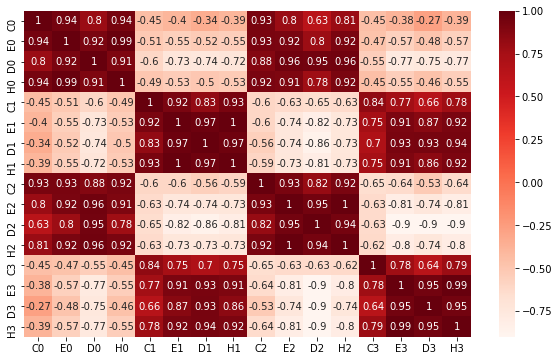

In [34]:
import seaborn as sns
corr= Together.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show    

In [35]:
# Wrapper Method
# Adding constant column of ones, mandatory for sm.OLS model
X=Together.drop('H3', 1)
Y=Together['H3']
import statsmodels.api as sm
New= sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
# We delete the columns E0, D0, H0, E2, C2, D2, H2, C3, E3, D3, H3
Together=Together.drop(Together.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15]], axis=1)


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
#clustering=SpectralClustering(n_clusters=3, eigen_solver='arpack', n_components=4, random_state=42, n_init=10, gamma=1, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None).fit(Together)
#labels=clustering.labels_
#labels

In [38]:
import numba as nb
import numpy as np
@nb.njit(fastmath=True,error_model="numpy",parallel=True)
def gaussian_kernel_2(X, X1, sigma):
    res=np.empty((X.shape[0],X1.shape[0]))
    for i in nb.prange(X.shape[0]):
        for j in range(X1.shape[0]):
            acc=0.
            for k in range(X.shape[1]):
                acc+=(X[i,k]-X1[j,k])**2/(2*sigma**2)
            res[i,j]=np.exp(-1*acc)
    return res

In [39]:
Matrix=Together.to_numpy()
print(Matrix.shape)
Matrix

(108, 3)


array([[6.59210440e+03, 1.93156836e-01, 2.33288603e-01],
       [6.28202360e+03, 2.00115941e-01, 1.72178066e-01],
       [7.18158713e+03, 2.06968175e-01, 2.01739681e-01],
       [5.38669053e+03, 1.61144795e-01, 2.37962069e-01],
       [7.65289596e+03, 1.71319316e-01, 1.48945794e-01],
       [7.12567422e+03, 1.82438329e-01, 1.93919791e-01],
       [5.95419669e+03, 1.48187611e-01, 2.14198991e-01],
       [5.42182261e+03, 2.86632695e-01, 2.37516450e-01],
       [6.79125409e+03, 1.91945459e-01, 2.35915850e-01],
       [6.24957322e+03, 1.59663068e-01, 1.74319709e-01],
       [6.09771965e+03, 1.95745595e-01, 1.01879729e-01],
       [6.76569001e+03, 2.53784977e-01, 8.73663888e-02],
       [5.99511883e+03, 1.46859017e-01, 1.36800962e-01],
       [7.41766628e+03, 1.47077372e-01, 1.15801809e-01],
       [6.26419514e+03, 1.99205616e-01, 1.07469633e-01],
       [6.23621496e+03, 1.41342321e-01, 1.06169497e-01],
       [7.96753214e+03, 1.62651888e-01, 1.11359373e-01],
       [7.07345761e+03, 1.89242

In [40]:
# Similarity Matrix
sigma=1000
SM=gaussian_kernel_2(Matrix, Matrix, sigma)
SM

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


array([[1.00000000e+00, 9.53062253e-01, 8.40511248e-01, ...,
        7.05182272e-02, 5.60076996e-01, 3.24020929e-07],
       [9.53062253e-01, 1.00000000e+00, 6.67238802e-01, ...,
        1.37264468e-01, 7.45365417e-01, 1.68219503e-06],
       [8.40511248e-01, 6.67238802e-01, 1.00000000e+00, ...,
        1.52495925e-02, 2.49538101e-01, 1.08539839e-08],
       ...,
       [7.05182272e-02, 1.37264468e-01, 1.52495925e-02, ...,
        1.00000000e+00, 4.71493523e-01, 6.70730692e-03],
       [5.60076996e-01, 7.45365417e-01, 2.49538101e-01, ...,
        4.71493523e-01, 1.00000000e+00, 6.53383426e-05],
       [3.24020929e-07, 1.68219503e-06, 1.08539839e-08, ...,
        6.70730692e-03, 6.53383426e-05, 1.00000000e+00]])

In [41]:
D = np.diag(np.sum(SM,axis=1))
D_half_inv = np.diag(1.0 / np.sqrt(np.sum(SM, axis=1)))
M = np.dot(D_half_inv, np.dot((D - SM), D_half_inv))

In [42]:
D

array([[71.20915019,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 75.0209084 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 55.97054933, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 32.58199788,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        68.47979775,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  2.26343989]])

In [43]:
D_half_inv 

array([[0.11850375, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.11545396, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13366577, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.17519074, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.12084224,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66468445]])

In [44]:
M

array([[ 9.85956861e-01, -1.30395381e-02, -1.33136104e-02, ...,
        -1.46401197e-03, -8.02044748e-03, -2.55223511e-08],
       [-1.30395381e-02,  9.86670383e-01, -1.02969914e-02, ...,
        -2.77637495e-03, -1.03991261e-02, -1.29092408e-07],
       [-1.33136104e-02, -1.02969914e-02,  9.82133461e-01, ...,
        -3.57099793e-04, -4.03065704e-03, -9.64328282e-10],
       ...,
       [-1.46401197e-03, -2.77637495e-03, -3.57099793e-04, ...,
         9.69308205e-01, -9.98172592e-03, -7.81042814e-04],
       [-8.02044748e-03, -1.03991261e-02, -4.03065704e-03, ...,
        -9.98172592e-03,  9.85397153e-01, -5.24810356e-06],
       [-2.55223511e-08, -1.29092408e-07, -9.64328282e-10, ...,
        -7.81042814e-04, -5.24810356e-06,  5.58194586e-01]])

In [45]:
(e_vals, e_vecs) = np.linalg.eigh(M) 
(e_vals, e_vecs)

(array([-3.24826971e-16,  1.11480507e-01,  4.98096391e-01,  6.81877618e-01,
         8.57357313e-01,  9.33741446e-01,  9.51693466e-01,  9.84460443e-01,
         9.96304475e-01,  9.99147786e-01,  9.99831858e-01,  9.99980811e-01,
         9.99997827e-01,  9.99999736e-01,  9.99999971e-01,  9.99999985e-01,
         9.99999995e-01,  9.99999997e-01,  9.99999999e-01,  9.99999999e-01,
         9.99999999e-01,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.0

In [46]:
# Let U be the matrix containing the differents vectors as columns
U=e_vecs

In [47]:
U

array([[ 1.04703791e-01, -4.05341565e-03,  6.18039338e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.07469608e-01, -3.90714741e-03,  2.97002192e-02, ...,
         6.53302183e-02, -4.55297388e-02,  1.16735526e-01],
       [ 9.28269950e-02, -3.90118675e-03,  1.07921948e-01, ...,
        -1.41412475e-01, -3.80959978e-02, -2.41263456e-02],
       ...,
       [ 7.08244748e-02,  3.58519561e-03, -1.88252505e-01, ...,
        -1.28162833e-02,  2.02792575e-02, -2.61433715e-02],
       [ 1.02677608e-01, -2.68484171e-03, -5.92877119e-02, ...,
        -5.15275193e-02,  6.16871501e-02, -6.28558000e-02],
       [ 1.86671918e-02,  6.78083854e-01,  1.15897858e-02, ...,
        -2.82559622e-09,  4.04829575e-09, -5.88024671e-10]])

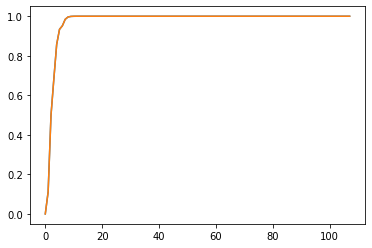

In [48]:
fig = plt.figure()
ax1 = plt.plot(e_vals)
plt.plot(e_vals)
#ax1.title.set_text('eigenvalues')
#i = np.where(e < 10e-6)[0]
#ax2 = plt.subplot(122)
#plt.plot(v[:, i[0]])
#fig.tight_layout()
plt.show()

In [49]:
e_vals_sorted_indices=np.argsort(e_vals)
e_vals_sorted=e_vals[e_vals_sorted_indices]
e_vals_sorted

array([-3.24826971e-16,  1.11480507e-01,  4.98096391e-01,  6.81877618e-01,
        8.57357313e-01,  9.33741446e-01,  9.51693466e-01,  9.84460443e-01,
        9.96304475e-01,  9.99147786e-01,  9.99831858e-01,  9.99980811e-01,
        9.99997827e-01,  9.99999736e-01,  9.99999971e-01,  9.99999985e-01,
        9.99999995e-01,  9.99999997e-01,  9.99999999e-01,  9.99999999e-01,
        9.99999999e-01,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  

[Text(0, 0.5, '$\\lambda$'),
 Text(0.5, 0, 'index'),
 Text(0.5, 1.0, 'Sorted Eigenvalues Graph Laplacian')]

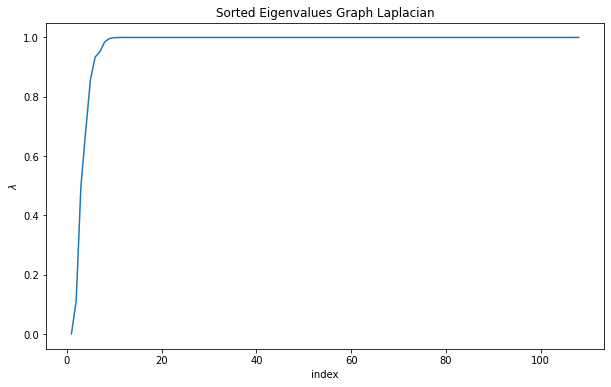

In [50]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(10,6)) 
sns.lineplot(x=range(1, e_vals_sorted_indices.size+1), y=e_vals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$')

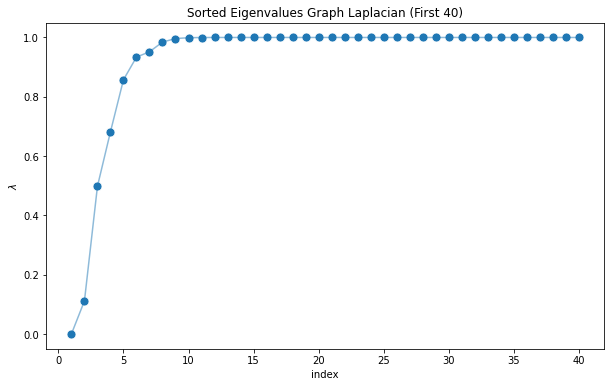

In [51]:
index_lim=40
fig, ax=plt.subplots(figsize=(10,6)) 
sns.scatterplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], alpha=0.5, ax=ax)
#ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [52]:
smallest_e_vals_index=np.argwhere(( 2.80318539e-01<e_vals)&(e_vals<7.27767736e-01 ))
e_vals[smallest_e_vals_index]

array([[0.49809639],
       [0.68187762]])

In [53]:
proj_df=pd.DataFrame(e_vecs[:, smallest_e_vals_index.squeeze()])
proj_df.columns=['v_'+str(c+1) for c in proj_df.columns]
proj_df.head()

,v_1,v_2
0,0.061804,-0.008580
1,0.029700,0.031352
2,0.107922,-0.093746
3,-0.074317,0.070224
4,0.125775,-0.148771


In [54]:
from sklearn.cluster import KMeans
inertias=[]
k_candidates=range(1,10)
for k in k_candidates:
  k_means=KMeans(random_state=42, n_clusters=k)
  k_means.fit(proj_df)
  inertias.append(k_means.inertia_)

[Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k'), Text(0.5, 1.0, 'Inertia K-Means')]

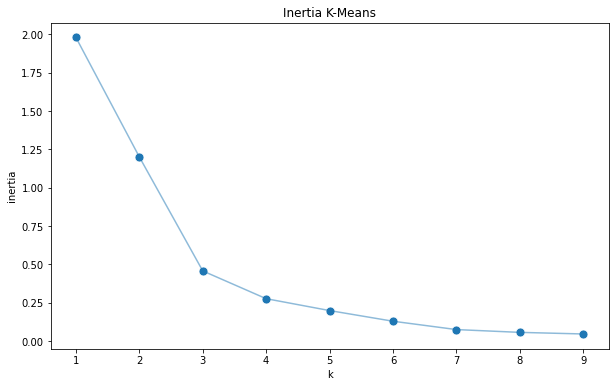

In [55]:
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x=k_candidates, y=inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y=inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')

In [56]:
def run_k_means(df, n_clusters):
  k_means=KMeans(random_state=25, n_clusters=n_clusters)
  k_means.fit(df)
  cluster=k_means.predict(df)
  return cluster

cluster=run_k_means(proj_df, n_clusters=3)  
cluster

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1,
       0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1],
      dtype=int32)